In [55]:
from rliable import library as rly
from rliable import metrics 
from rliable import plot_utils
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading of the results

NORMALIZATION

In [57]:
algorithms = ['SPR', 'DQN']

SPR = np.array([[284.4], [225.2],[309.55], [215.6], [363.3], [268.65]])
DQN = np.array([[278.6], [254.6], [214.55],[229.25], [158.65],[135.45]])

human = 309.55
random = 0

def normalize(result, human, random):
    return (result - random) / (human - random)

SPR = normalize(SPR, human, random)
DQN = normalize(DQN, human, random)

##  Metrics with stratified bootstraps

Allow to copute confidence intervals using stratified sampling. We sample with replacement on the original data and we compute our parameters within this sample. We use those data to compute std and confidence intervals. 

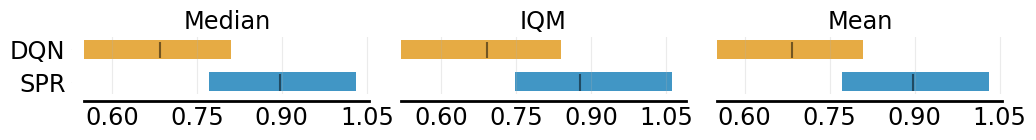

In [58]:



# Create a dictionary mapping algorithm names to their score matrices.

atari_200m_normalized_score_dict = {'SPR': SPR, 'DQN': DQN}
aggregate_func = lambda x: np.array([
  metrics.aggregate_median(x),
  metrics.aggregate_iqm(x),
  metrics.aggregate_mean(x),])
aggregate_scores, aggregate_score_cis = rly.get_interval_estimates(
  atari_200m_normalized_score_dict, aggregate_func, reps=50000)
fig, axes = plot_utils.plot_interval_estimates(
  aggregate_scores, aggregate_score_cis,
  metric_names=['Median', 'IQM', 'Mean'],
  algorithms=algorithms, xlabel='')

## Performance profile

The score of each algorithm are sorted in ascending order and plotted

<Axes: xlabel='Human Normalized Score $(\\tau)$', ylabel='Fraction of runs with score $> \\tau$'>

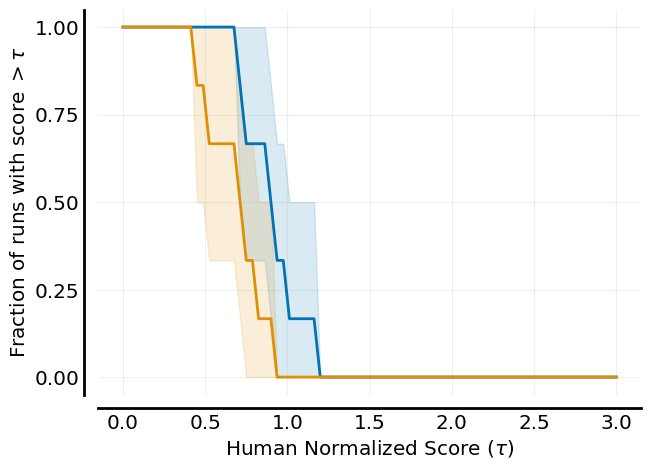

In [59]:
atari_200m_thresholds = np.linspace(0.0, 3.0, 81)
score_distributions, score_distributions_cis = rly.create_performance_profile(
    atari_200m_normalized_score_dict, atari_200m_thresholds)
# Plot score distributions
fig, ax = plt.subplots(ncols=1, figsize=(7, 5))
plot_utils.plot_performance_profiles(
  score_distributions, atari_200m_thresholds,
  performance_profile_cis=score_distributions_cis,
  colors=dict(zip(algorithms, sns.color_palette('colorblind'))),
  xlabel=r'Human Normalized Score $(\tau)$',
  ax=ax)